해결문제)

daum 영화 사이트에서 2018, 2019년 박스 오피스 정보를 추출하여 텍스트 파일을 작성하시오,
작성된 텍스트 파일을 읽어서 년도별 박스 오피스의 순위별 평점 현황을 그래프로 그리시오.
+ https://movie.daum.net/boxoffice/yearly


```
2018,'신과함께-인과 연', 6.8, '2018.08.01'
2018,'어벤져스: 인피니티 워', 7.6, '2018.04.25'
2018,'보헤미안 랩소디', 8.9, '2018.10.31'
2018,'미션 임파서블: 폴아웃', 8.1, '2018.07.25'
2018,'신과함께-죄와 벌', 7.0, '2017.12.20'
2018,'쥬라기 월드: 폴른 킹덤', 7.1, '2018.06.06'
```


In [ ]:
#한글 폰트 사용 : colab , 런타임 다시 시작 하기
%config InlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 145480 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup as bs

import matplotlib.pyplot as plt

import matplotlib as mpl
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

import re

In [ ]:
#문자열에서 charset요소값을 찾아줌
def charEncode(st) :
    pt = r'charset=[\"\']*([\w-]+)'

    charcode  = re.search(pt, st)
    if charcode : 
        cc = charcode.group(1)
    else :
        cc = 'utf-8'

    return cc

#해당 페이지를 decode한 html문서 가져오기
def urlHtml(url):
    data = urlopen(url).read()
    urlcc = charEncode(str(data))
    html = data.decode(urlcc, errors="replace")

    html = bs(html, 'html.parser')
    return html

In [20]:
def mvlist(year):
    mvlt = [] 
    url = 'https://movie.daum.net/boxoffice/yearly?year=' + str(year)

    html = urlHtml(url)
    ul = html.select('.list_boxthumb > li')
  
    for li in ul :
      lilt=[]
      ainfo = str(li.select_one('a'))
      id = re.search(r'data-tiara-id=\"([\d]+)', ainfo).group(1)
      rank = re.search(r'data-tiara-ordnum=\"([\d]+)', ainfo).group(1)
      href = re.search(r'href=\"([\w\/?=]+)', ainfo).group(1)
      mvname = li.select_one('strong').text.replace(',', '') #영화명에 ,가 있는 걸 삭제
      grade = li.select_one('.emph_grade').text
      openday=li.select_one('dd').text
      
      lilt.append(id)
      lilt.append(rank)
      lilt.append(href)
      lilt.append(mvname)
      lilt.append(float(grade))
      lilt.append(openday[:10])

      mvlt.append(lilt)

    return mvlt

In [21]:
mvlist(2019)

[['119859', '1', '/moviedb/main?movieId=119859', '극한직업', 7.4, '2019.01.23'],
 ['93252',
  '2',
  '/moviedb/main?movieId=93252',
  '어벤져스: 엔드게임',
  7.8,
  '2019.04.24'],
 ['93004', '3', '/moviedb/main?movieId=93004', '겨울왕국 2', 7.3, '2019.11.21'],
 ['115601', '4', '/moviedb/main?movieId=115601', '알라딘', 8.4, '2019.05.23'],
 ['111292', '5', '/moviedb/main?movieId=111292', '기생충', 7.9, '2019.05.30'],
 ['121137', '6', '/moviedb/main?movieId=121137', '엑시트', 7.7, '2019.07.31'],
 ['122542',
  '7',
  '/moviedb/main?movieId=122542',
  '스파이더맨: 파 프롬 홈',
  6.5,
  '2019.07.02'],
 ['133855', '8', '/moviedb/main?movieId=133855', '백두산', 6.3, '2019.12.19'],
 ['101393', '9', '/moviedb/main?movieId=101393', '캡틴 마블', 6.3, '2019.03.06'],
 ['125080', '10', '/moviedb/main?movieId=125080', '조커', 7.7, '2019.10.02'],
 ['121160', '11', '/moviedb/main?movieId=121160', '봉오동 전투', 8.8, '2019.08.07'],
 ['116523', '12', '/moviedb/main?movieId=116523', '라이온 킹', 7.4, '2019.07.17'],
 ['123374',
  '13',
  '/moviedb/main?movie

In [23]:
mv2019 = mvlist(2019)
mv2018 = mvlist(2018)

mv = mv2018+mv2019

for line in mv :
  print(line)

with open('/content/drive/MyDrive/Colab Notebooks/winterSch/movielist.txt', 'w') as fp:
    for line in mv:
      line = str(line).replace('[','').replace(']','')+'\n' 
      fp.write(line)

['120166', '1', '/moviedb/main?movieId=120166', '신과함께-인과 연', 6.8, '2018.08.01']
['93251', '2', '/moviedb/main?movieId=93251', '어벤져스: 인피니티 워', 7.6, '2018.04.25']
['115280', '3', '/moviedb/main?movieId=115280', '보헤미안 랩소디', 8.8, '2018.10.31']
['99611', '4', '/moviedb/main?movieId=99611', '미션 임파서블: 폴아웃', 8.1, '2018.07.25']
['73003', '5', '/moviedb/main?movieId=73003', '신과함께-죄와 벌', 7.1, '2017.12.20']
['108035', '6', '/moviedb/main?movieId=108035', '쥬라기 월드: 폴른 킹덤', 6.7, '2018.06.06']
['110746', '7', '/moviedb/main?movieId=110746', '앤트맨과 와스프', 7.4, '2018.07.04']
['110556', '8', '/moviedb/main?movieId=110556', '안시성', 7.6, '2018.09.19']
['98033', '9', '/moviedb/main?movieId=98033', '블랙 팬서', 6.2, '2018.02.14']
['117910', '10', '/moviedb/main?movieId=117910', '완벽한 타인', 7.5, '2018.10.31']
['108595', '11', '/moviedb/main?movieId=108595', '1987', 9.5, '2017.12.27']
['108633', '12', '/moviedb/main?movieId=108633', '독전', 6.6, '2018.05.22']
['109169', '13', '/moviedb/main?movieId=109169', '공작', 8.4, '2

In [24]:
with open('/content/drive/MyDrive/Colab Notebooks/winterSch/movielist.txt', encoding='utf-8') as fp:
  data = fp.readlines()
for line in data :
  print(line)

'120166', '1', '/moviedb/main?movieId=120166', '신과함께-인과 연', 6.8, '2018.08.01'

'93251', '2', '/moviedb/main?movieId=93251', '어벤져스: 인피니티 워', 7.6, '2018.04.25'

'115280', '3', '/moviedb/main?movieId=115280', '보헤미안 랩소디', 8.8, '2018.10.31'

'99611', '4', '/moviedb/main?movieId=99611', '미션 임파서블: 폴아웃', 8.1, '2018.07.25'

'73003', '5', '/moviedb/main?movieId=73003', '신과함께-죄와 벌', 7.1, '2017.12.20'

'108035', '6', '/moviedb/main?movieId=108035', '쥬라기 월드: 폴른 킹덤', 6.7, '2018.06.06'

'110746', '7', '/moviedb/main?movieId=110746', '앤트맨과 와스프', 7.4, '2018.07.04'

'110556', '8', '/moviedb/main?movieId=110556', '안시성', 7.6, '2018.09.19'

'98033', '9', '/moviedb/main?movieId=98033', '블랙 팬서', 6.2, '2018.02.14'

'117910', '10', '/moviedb/main?movieId=117910', '완벽한 타인', 7.5, '2018.10.31'

'108595', '11', '/moviedb/main?movieId=108595', '1987', 9.5, '2017.12.27'

'108633', '12', '/moviedb/main?movieId=108633', '독전', 6.6, '2018.05.22'

'109169', '13', '/moviedb/main?movieId=109169', '공작', 8.4, '2018.08.08'

'

In [25]:
def mvlist2(year):
    mvlt = [] 
    url = 'https://movie.daum.net/boxoffice/yearly?year=' + str(year)

    html = urlHtml(url)
    ul = html.select('.list_boxthumb > li')

    mvlt = []
    for li in ul :
        mvsp = li.getText().replace('\n\n', '').split('\n')
        mvsp[0] = str(year)
        #mvlt.append(mvsp)
        mvlt.append(mvsp[:len(mvsp)-1])

    return mvlt

In [26]:
mvlist2(2019)

[['2019', '1위', '극한직업평점 ', '7.4/10', '개봉일', '2019.01.23 개봉'],
 ['2019', '2위', '어벤져스: 엔드게임평점 ', '7.8/10', '개봉일', '2019.04.24 개봉'],
 ['2019', '3위', '겨울왕국 2평점 ', '7.3/10', '개봉일', '2019.11.21 개봉'],
 ['2019', '4위', '알라딘평점 ', '8.4/10', '개봉일', '2019.05.23 개봉'],
 ['2019', '5위', '기생충평점 ', '7.9/10', '개봉일', '2019.05.30 개봉'],
 ['2019', '6위', '엑시트평점 ', '7.7/10', '개봉일', '2019.07.31 개봉'],
 ['2019', '7위', '스파이더맨: 파 프롬 홈평점 ', '6.5/10', '개봉일', '2019.07.02 개봉'],
 ['2019', '8위', '백두산평점 ', '6.3/10', '개봉일', '2019.12.19 개봉'],
 ['2019', '9위', '캡틴 마블평점 ', '6.3/10', '개봉일', '2019.03.06 개봉'],
 ['2019', '10위', '조커평점 ', '7.7/10', '개봉일', '2019.10.02 개봉'],
 ['2019', '11위', '봉오동 전투평점 ', '8.8/10', '개봉일', '2019.08.07 개봉'],
 ['2019', '12위', '라이온 킹평점 ', '7.4/10', '개봉일', '2019.07.17 개봉'],
 ['2019', '13위', '나쁜 녀석들: 더 무비평점 ', '6.2/10', '개봉일', '2019.09.11 개봉'],
 ['2019', '14위', '82년생 김지영평점 ', '6.7/10', '개봉일', '2019.10.23 개봉'],
 ['2019', '15위', '분노의 질주: 홉스&쇼평점 ', '6.5/10', '개봉일', '2019.08.14 개봉'],
 ['2019', '16위', '토이 스토리 4평점 

['119859', ' 1', ' /moviedb/main?movieId=119859', ' 극한직업', ' 7.4', ' 2019.01.23']
['93252', ' 2', ' /moviedb/main?movieId=93252', ' 어벤져스: 엔드게임', ' 7.8', ' 2019.04.24']
['93004', ' 3', ' /moviedb/main?movieId=93004', ' 겨울왕국 2', ' 7.4', ' 2019.11.21']
['115601', ' 4', ' /moviedb/main?movieId=115601', ' 알라딘', ' 8.4', ' 2019.05.23']
['111292', ' 5', ' /moviedb/main?movieId=111292', ' 기생충', ' 7.9', ' 2019.05.30']
['121137', ' 6', ' /moviedb/main?movieId=121137', ' 엑시트', ' 7.7', ' 2019.07.31']
['122542', ' 7', ' /moviedb/main?movieId=122542', ' 스파이더맨: 파 프롬 홈', ' 6.5', ' 2019.07.02']
['133855', ' 8', ' /moviedb/main?movieId=133855', ' 백두산', ' 6.5', ' 2019.12.19']
['101393', ' 9', ' /moviedb/main?movieId=101393', ' 캡틴 마블', ' 6.3', ' 2019.03.06']
['125080', ' 10', ' /moviedb/main?movieId=125080', ' 조커', ' 7.7', ' 2019.10.02']
['121160', ' 11', ' /moviedb/main?movieId=121160', ' 봉오동 전투', ' 8.8', ' 2019.08.07']
['116523', ' 12', ' /moviedb/main?movieId=116523', ' 라이온 킹', ' 7.4', ' 2019.07.17']
['

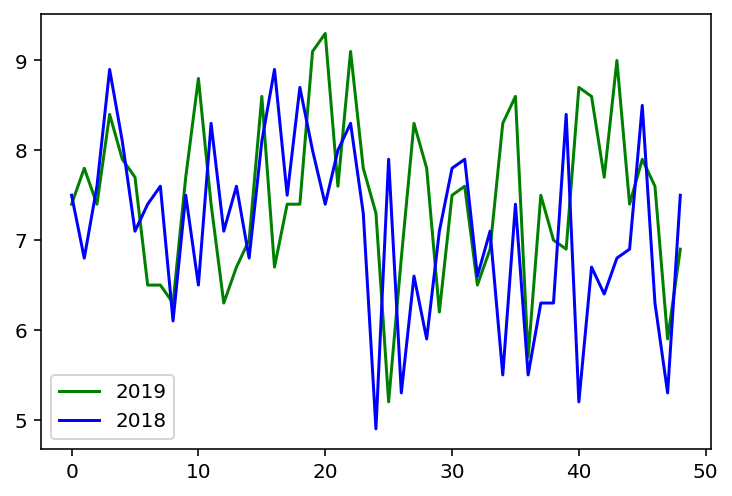

In [37]:
with open('/content/drive/MyDrive/Colab Notebooks/winterSch/mv1.csv', 'r', encoding='utf-8') as fp :
    data = fp.readlines()

grade2019 = []
grade2018 = [] 
grade = {}

for line in data :
    #데이터 생성시 영화명에 ,를 제거하면 수행하지 않아도 됨
    line = line.replace("', ", "'| ").replace(", '", "| '").replace('\n','')
    line = line.replace("'","").split('|')

    #line = line.split(',')
    print(line)
    if line[5].strip()[:4] == '2019' : grade2019.append(float(line[4]) )
    elif line[5].strip()[:4] == '2018' : grade2018.append(float(line[4]) )


print(grade2019)
print(grade2018)

plt.plot(grade2019, 'g', label='2019')
plt.plot(grade2018, 'b', label='2018')
plt.legend()
plt.show()
 